## Problem 1: Linear System with TensorFlow

You will solve the following system of linear equations using some methods of the TensorFlow:

<img src='figures/HW02/fig_1.png' width="300" height="300">

The objective of following questions is to find a vector  (x,y,z) .

(0) Start with importing modules.

&nbsp;&nbsp;&nbsp;&nbsp;The lectures are conducted using tensorflow 1, but recently, tensorflow 2 is used a lot, so you can choose between tensorflow 1 and 2, and then solve the problems.

&nbsp;&nbsp;&nbsp;&nbsp;If you run !pip install tensorflow, then tensorflow 2 is installed. To run tensorflow 1, execute the cell below.

In [1]:
import numpy as np

# if you want to use tensorflow 2
import tensorflow as tf

/home/sybaee/.local/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.13.1) or chardet (2.3.0)/charset_normalizer (2.0.2) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
import numpy as np

# if you want to use tensorflow 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


(a) Use tf.constant to find  x .

In [3]:
A_unshaped = tf.constant([1, 2, -3, 1, -1, -1, 2, 1, -2], dtype = tf.float32)
b_unshaped = tf.constant([4, 0, 6], dtype=tf.float32)

In [4]:
# Tensorflow 1
A = tf.reshape(A_unshaped, [3, -1])
b = tf.reshape(b_unshaped, [3, 1])
A_inv = tf.linalg.inv(A)

x = tf.matmul(A_inv, b)

with tf.Session() as sess:
    result = sess.run(x)
    print('x:\n', result)

x:
 [[3.]
 [2.]
 [1.]]


(b) You will design an objective function and optimize it to find  x . Use tf.Variable.

You can choose between tensorflow 1 and 2, and then solve it

hint:

&nbsp;&nbsp;&nbsp;&nbsp;tensorflow 1: tf.reduce_mean, tf.math.square, tf.train.GradientDescentOptimizer().minimize()

&nbsp;&nbsp;&nbsp;&nbsp;tensorflow 2: tf.reduce_mean, tf.math.square, tf.keras.optimizers.SGD()

In [6]:
x = tf.Variable([[0], [0], [0]], dtype=tf.float32)
A = tf.reshape(A_unshaped, [3, 3])
b = tf.reshape(b_unshaped, [3, 1])
LearningRate = 0.1

cost = tf.reduce_mean(tf.square(tf.matmul(A, x) - b))
optm = tf.train.GradientDescentOptimizer(LearningRate).minimize(cost)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for _ in range(500):
    sess.run(optm)
    
print('x:\n', sess.run(x))

x:
 [[2.9999988 ]
 [1.9999994 ]
 [0.99999905]]


## Problem 2: Digit Classification with Scikit-Learn

In this problem, we will try to classify handwritten digits. For the sake of simplicity, we simplify this digit classification problem into a binary classification between digit 0 and digit 1.

### Step 1. Load the Data

<img src='figures/HW02/fig_2.png' width="400" height="400">

Download data to read the files in Python.

To read the files in Python, use the following code:

In [8]:
import matplotlib.pyplot as plt
from six.moves import cPickle
import numpy as np
data = cPickle.load(open('./figures/HW02/data.pkl', 'rb'))
data0 = data['0']
data1 = data['1']

print('digit 0: ', data0.shape)
print('digit 1: ', data1.shape)

digit 0:  (1000, 28, 28)
digit 1:  (1000, 28, 28)


Here, we loaded 1000 numbers of data from ‘0’ and ‘1’. To display the image, use plt.imshow(img).

&nbsp;&nbsp;&nbsp;&nbsp;Note: make sure you are reading the files correctly. Check by displaying the few random images in each class.

&nbsp;&nbsp;&nbsp;&nbsp;Note: calculations are more manageable if you go though and convert each of the pixels in  28×28  matrix to a binary value first.

(1) Display the few random images in each class.

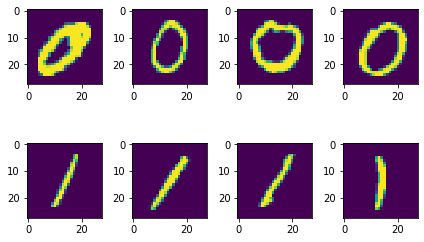

In [9]:
import random

fig, ax = plt.subplots(nrows=2, ncols=4)
ax = ax.flatten()
for count, index in enumerate(random.sample(range(1000), 8)):
    img = data0[index] if count // 4 == 0 else data1[index]
    ax[count].imshow(img, interpolation='nearest')

plt.tight_layout()
plt.show()

(2) Convert each of the pixels in 28×28 matrix to a binary value.

In [10]:
data0 = np.where(data0 > 128, 1, 0)
data1 = np.where(data1 > 128, 1, 0)

### Step 2. Extract Features

Now we must select ‘features’ from image data to detect digit 0 and digit 1. Two features are recommended

  (a) The total average pixels located at the center of the image (img[10:20,10:20]).

  (b) The total average pixels over the entire image.

  (c) Include the ones as our bias term.

<img src='figures/HW02/fig_3.png' width="200" height="200">

You should end up with a  2000×3  input matrix with the first  1000  rows correspond to all of the ‘data0’ and the second 1000 rows correspond to the two features for all of the given ‘data1’.

In [11]:
feature1 = []
feature2 = []
for i in range(2):
    data = data0 if i == 0 else data1
    for j in range(len(data)):
        feature1.append(data[j][10:20, 10:20].mean())
        feature2.append(data[j].mean())

feature1 = np.array(feature1).reshape(-1, 1)
feature2 = np.array(feature2).reshape(-1, 1)
pi = np.hstack([np.ones([2000, 1]), feature1, feature2])

pi.shape

(2000, 3)

### Step 3. Plot the Data

Plot the data to see if classes are separable. The expected plot is the following:

<img src='figures/HW02/fig_4.png' width="500" height="500">

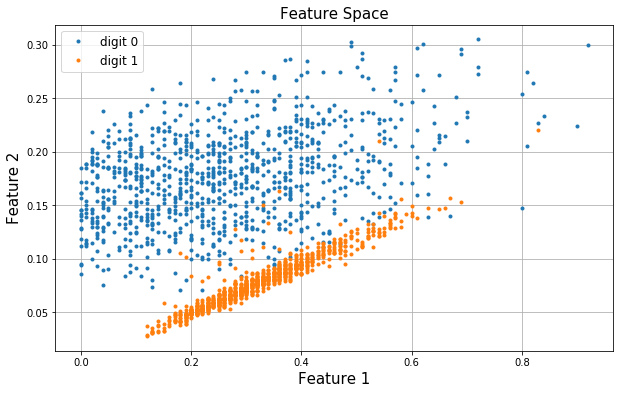

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(feature1[:1000], feature2[:1000], 'o', markersize=3, label='digit 0')
plt.plot(feature1[1000:], feature2[1000:], 'o', markersize=3, label='digit 1')
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.legend(fontsize=12)
plt.title('Feature Space', fontsize=15)
plt.grid()
plt.show()

### Step 4. Digit Classification with Logistic Regrssion

In [13]:
from sklearn import linear_model

(1) Use the logistic regression algorithm to classify digit0 and digit1 data set.

&nbsp;&nbsp;&nbsp;&nbsp;Note: you don't need to implement full algorithm by yourself. Just use sklearn library which we have learned in class.

&nbsp;&nbsp;&nbsp;&nbsp;Use LogisticRegression(solver = liblinear)

In [15]:
X = np.asmatrix(pi[:, 1:])
y = np.asmatrix(np.vstack([np.zeros([1000, 1]), np.ones([1000, 1])]))

clf = linear_model.LogisticRegression(solver='liblinear', C=100, tol=1e-10)
clf.fit(X, np.ravel(y))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=1e-10, verbose=0,
                   warm_start=False)

(2) Plot the classifier (decision boundary).

&nbsp;&nbsp;&nbsp;&nbsp;Note that the decision boundary is given:

<img src='figures/HW02/fig_5.png' width="300" height="300">

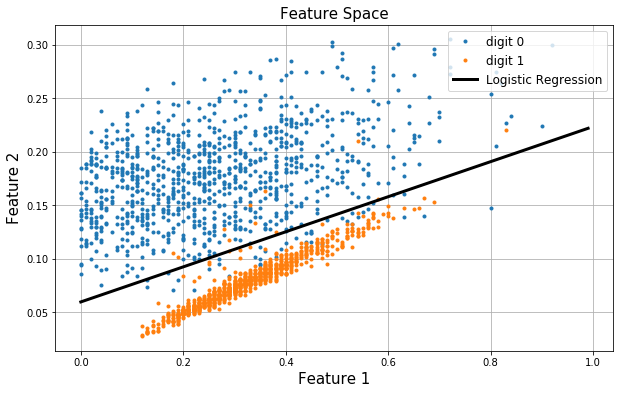

In [17]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]

xp = np.arange(0, 1, 0.01).reshape(-1, 1)
yp = -w1/w2*xp - w0/w2

plt.figure(figsize=(10, 6))
plt.plot(feature1[:1000], feature2[:1000], 'o', markersize=3, label='digit 0')
plt.plot(feature1[1000:], feature2[1000:], 'o', markersize=3, label='digit 1')
plt.plot(xp, yp, 'black', linewidth=3, label='Logistic Regression')
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.legend(loc=1, fontsize=12)
plt.title('Feature Space', fontsize=15)
plt.grid()
plt.show()

## Problem 3: Understanding Probability in Logistic Regression

In this problem, we are going to understand probability in the logistic regression.

Note: you need to write down full codes for this problem by yourself. Do not just use sklearn library.

Linear Regression vs. Logistic Regression

In the case of categorical(0 or 1) data, linear regression is not possible to properly represent the relationship between input and output data. As shown in the figure on the right, logistic regression adds a non-linear characteristic (sigmoid function) to linear regression and fits the relationship between input and output data into a curve.

We can define the S-Curve as a probability by the characteristics of the sigmoid function.

<img src='figures/HW02/fig_6.png' width="600" height="600">

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1. Data Generation

We are going to examine the relationship between basketball shooting accuracy and the number of shot. More specifically, We want a model that takes in "the number of shot" and spits out the probability that you will make the shot.

Here is the shape of  ω  and  x .

<img src='figures/HW02/fig_7.png' width="400" height="400">

(1) Generate the data set by the following description.

<img src='figures/HW02/fig_8.png' width="700" height="300">

(2) After generating all data, plot them to check it.

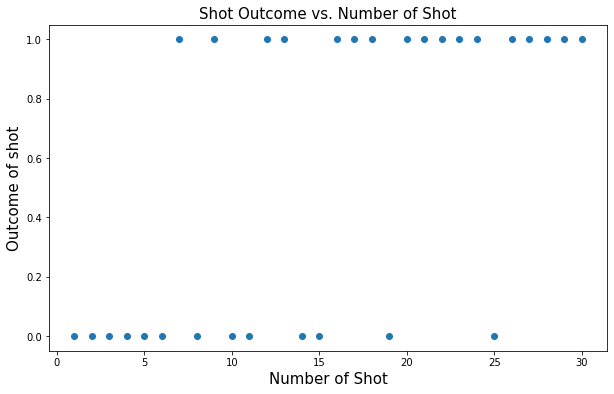

In [19]:
shot_X = np.array(range(1, 31))
shot_y = np.array([1 if i in [7, 9, 12, 13, 16, 17, 18, 20, 21, 22, 23, 24, 
                         26, 27, 28, 29, 30] else 0 for i in range(1, 31)])

plt.figure(figsize=(10, 6))
plt.plot(shot_X, shot_y, 'o')
plt.xlabel('Number of Shot', fontsize=15)
plt.ylabel('Outcome of shot', fontsize=15)
plt.title('Shot Outcome vs. Number of Shot', fontsize=15)
plt.show()

### Step 2. Logistic Regression with Gradient Descent

(1) Define the sigmoid (logistic) function.

<img src='figures/HW02/fig_9.png' width="400" height="400">

In [20]:
def h(X, w):
    return tf.sigmoid(tf.matmul(X, w))

(2) [hand written] Write the gradient of log likelihood.

(3) [hand written] Write the gradient descent algorithm for this problem.

Note: this problem is maximization problem.

(4) Initialize  ω  and update it by gradient descent method.


In [21]:
train_X = np.asmatrix(np.hstack([np.ones([30, 1]), shot_X.reshape(-1, 1)]))
train_y = np.asmatrix(shot_y.reshape(-1, 1))

m = 30
LR = 0.05
n_iter = 20000

X = tf.placeholder(tf.float32, [m, 2])
y = tf.placeholder(tf.float32, [m, 1])

w = tf.Variable([[0], [0]], dtype=tf.float32)

y_pred = h(X, w)
loss = -(y*tf.log(y_pred) + (1-y)*tf.log(1-y_pred))
loss = tf.reduce_mean(loss)

optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

logistic_loss_record = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_iter): 
        _, c = sess.run([optm, loss], feed_dict={X: train_X, y: train_y})
        logistic_loss_record.append(c)
    
    w_hat = sess.run(w)
    
print(w_hat)

[[-2.5872126 ]
 [ 0.19501638]]


### Step 3. Linear Regression with Gradient Descent

(1) [hand written] The below is the objective function of linear regression.

<img src='figures/HW02/fig_10.png' width="300" height="300">

In [22]:
LR = 0.001
n_iter = 10000

X = tf.placeholder(tf.float32, [m, 2])
y = tf.placeholder(tf.float32, [m, 1])

theta = tf.Variable([[0], [0]], dtype=tf.float32)

y_pred = tf.matmul(X, theta)
loss = tf.square(y_pred - y)
loss = tf.reduce_mean(loss)

optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

linear_loss_record = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_iter):                                                                         
        _, c = sess.run([optm, loss], feed_dict={X: train_X, y: train_y})
        linear_loss_record.append(c)
    
    theta_val = sess.run(theta)

print(theta_val)

[[0.02508264]
 [0.03493777]]


### Step 4. Compare Linear Regression and Logistic Regression Models

(1) Define the prediction model and make predictions using the trained models

<img src='figures/HW02/fig_11.png' width="400" height="400">

In [23]:
def get_predictions(w, theta):
    with tf.Session() as sess:
        logistic_predictions = sess.run(tf.sigmoid(w[0, 0] + w[1, 0] * shot_X))
    
    linear_predictions = theta[0, 0] + theta[1, 0] * shot_X
    
    return np.array(logistic_predictions), np.array(linear_predictions)

(2) Plot the predicted values.

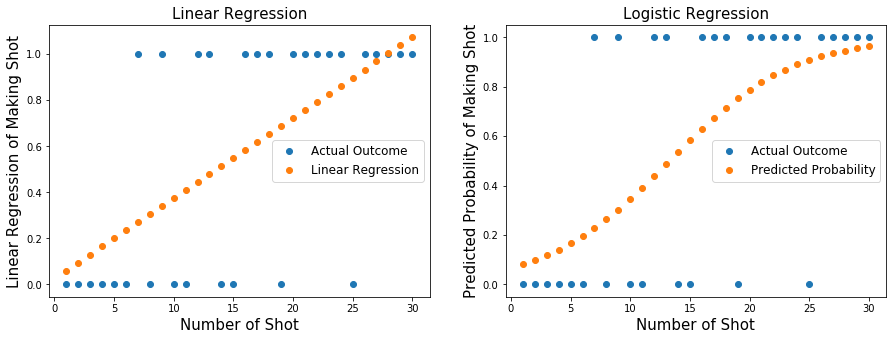

In [24]:
logistic_predictions, linear_predictions = get_predictions(w_hat, theta_val)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(shot_X, shot_y, 'o', label='Actual Outcome')
ax[0].plot(shot_X, linear_predictions, 'o', label='Linear Regression')
ax[0].set_xlabel('Number of Shot', fontsize=15)
ax[0].set_ylabel('Linear Regression of Making Shot', fontsize=15)
ax[0].set_title('Linear Regression', fontsize=15)
ax[0].legend(fontsize=12)

ax[1].plot(shot_X, shot_y, 'o', label='Actual Outcome')
ax[1].plot(shot_X, logistic_predictions, 'o', label='Predicted Probability')
ax[1].set_xlabel('Number of Shot', fontsize=15)
ax[1].set_ylabel('Predicted Probability of Making Shot', fontsize=15)
ax[1].set_title('Logistic Regression', fontsize=15)
ax[1].legend(fontsize=12)

plt.show()

### Step 5. Cost Function of Logistic Regression

The cost function summarizes how well the model is behaving. In other words, we use the cost function to measure how close the model’s predictions are to the actual outputs.

<img src='figures/HW02/fig_12.png' width="800" height="800">

Plot the cost function using the predicted values from logistic regression.

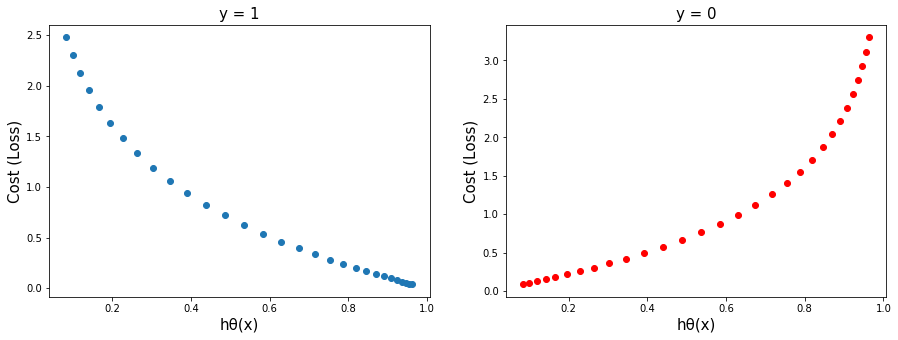

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(logistic_predictions, -np.log(logistic_predictions), 'o')
ax[0].set_xlabel('hθ(x)', fontsize=15)
ax[0].set_ylabel('Cost (Loss)', fontsize=15)
ax[0].set_title('y = 1', fontsize=15)

ax[1].plot(logistic_predictions, -np.log(1 - logistic_predictions), 'ro',)
ax[1].set_xlabel('hθ(x)', fontsize=15)
ax[1].set_ylabel('Cost (Loss)', fontsize=15)
ax[1].set_title('y = 0', fontsize=15)

plt.show()